In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("data/CarSalePrice.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

## Looking at some plots 

In [29]:
import matplotlib.pyplot as plt

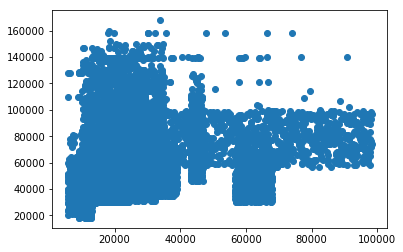

In [9]:
plt.scatter(df['Dist_travelled'], df['SellingPrice'])

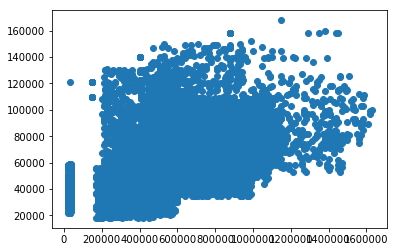

In [10]:
print(plt.scatter(df['InitialBuyingPrice'], df['SellingPrice']))

In [14]:
df['ImportedOrNot'] = df['ImportedOrNot'].astype('category')
df['YearOfRegistration'] = df['YearOfRegistration'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Fuel'] = df['Fuel'].astype('category')
df['Safetyscore'] = df['Safetyscore'].astype('category')

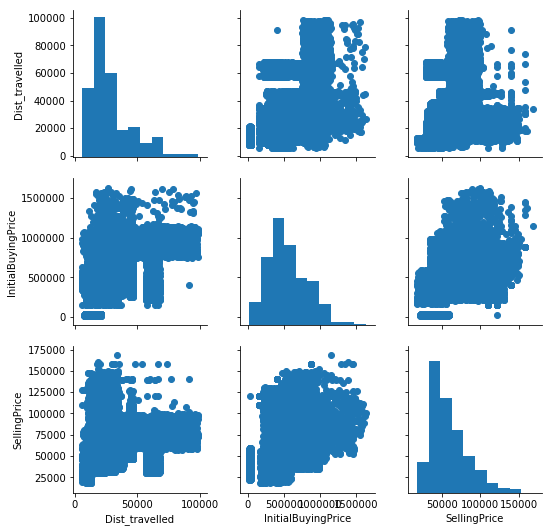

In [13]:
g = sns.PairGrid(df[[ 'Dist_travelled',  'InitialBuyingPrice', 'SellingPrice']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

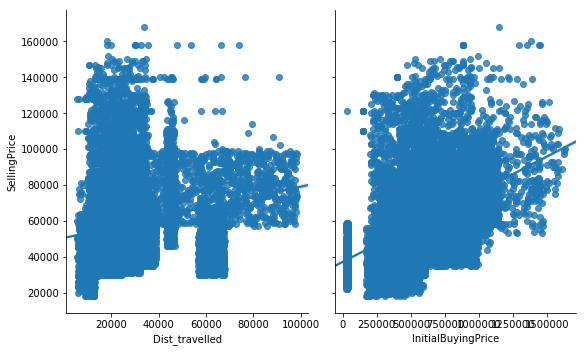

In [14]:
sns.pairplot(df, x_vars=['Dist_travelled', 'InitialBuyingPrice'], y_vars=["SellingPrice"],
             height=5, aspect=.8, kind="reg")

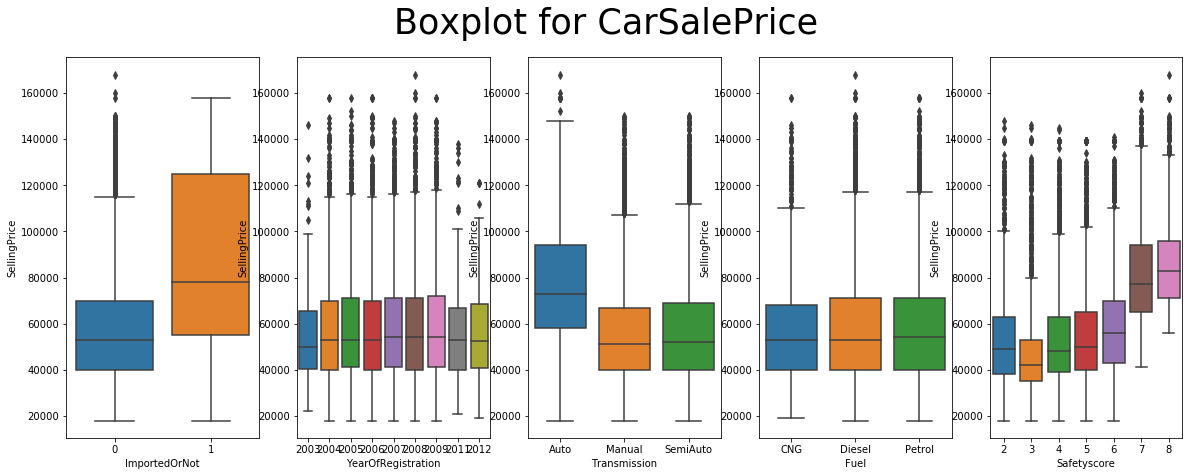

In [16]:
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,7))

fig.suptitle("Boxplot for CarSalePrice", fontsize=35)

sns.boxplot(x="ImportedOrNot", y="SellingPrice", data=df,ax=ax1)
sns.boxplot(x="YearOfRegistration", y="SellingPrice", data=df,ax=ax2)
sns.boxplot(x="Transmission", y="SellingPrice", data=df,ax=ax3)
sns.boxplot(x="Fuel", y="SellingPrice", data=df,ax=ax4)
sns.boxplot(x="Safetyscore", y="SellingPrice", data=df,ax=ax5)

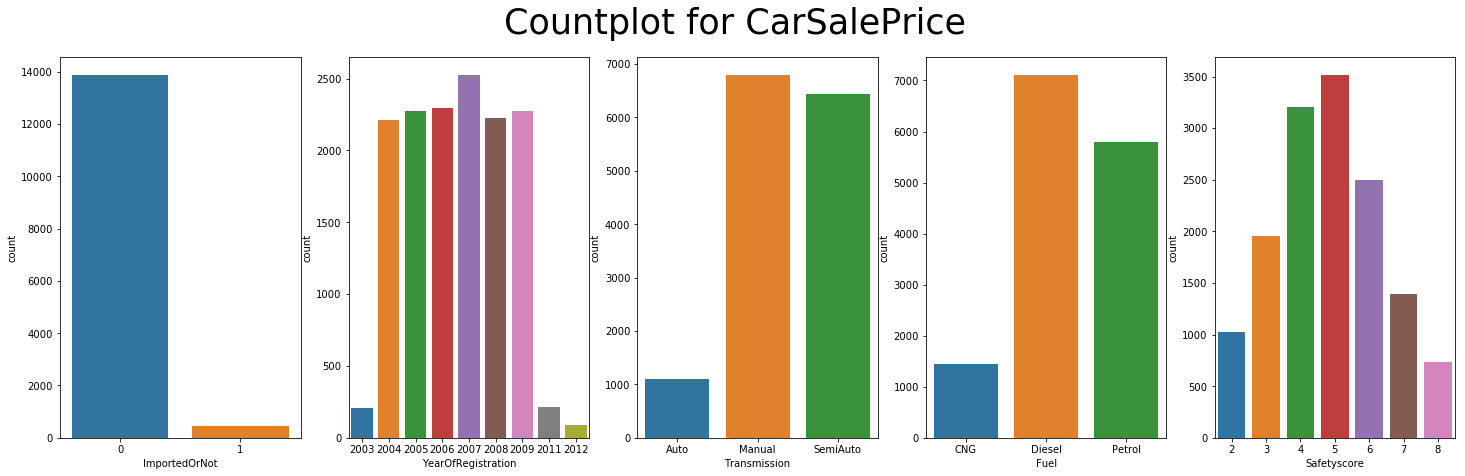

In [17]:
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1,5,figsize=(25,7))

fig.suptitle("Countplot for CarSalePrice", fontsize=35)

sns.countplot(x="ImportedOrNot", data=df,ax=ax1)
sns.countplot(x="YearOfRegistration", data=df,ax=ax2)
sns.countplot(x="Transmission", data=df,ax=ax3)
sns.countplot(x="Fuel", data=df,ax=ax4)
sns.countplot(x="Safetyscore", data=df,ax=ax5)

Fuel and YearOfRegistration seem to have low predictive power

In [17]:
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,Dist_travelled,InitialBuyingPrice,SellingPrice
Dist_travelled,1,0.32,0.2
InitialBuyingPrice,0.32,1,0.45
SellingPrice,0.2,0.45,1


## Encoding categorical variables

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
cat_cols = ["ImportedOrNot","Transmission","Safetyscore"] # Dropping Fuel and YearOfRegistration
# cat_cols = ["ImportedOrNot","Transmission","Safetyscore",'Fuel', 'YearOfRegistration']
enc = OneHotEncoder(handle_unknown='ignore', drop='first')
enc_df = pd.DataFrame(enc.fit_transform(df[cat_cols]).toarray())

df = df.join(enc_df)

## Training a linear regressor

In [24]:
X = df.drop(columns=cat_cols+['Fuel', 'YearOfRegistration','SellingPrice'])
y = df['SellingPrice']

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=1/4, random_state=0)
regressor= LinearRegression()
regressor.fit(X_train,y_train)

/Users/arunavade/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [14]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           SellingPrice   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     430.4
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:59:07   Log-Likelihood:            -1.2152e+05
No. Observations:               10741   AIC:                         2.431e+05
Df Residuals:                   10728   BIC:                         2.432e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.292e+04   1281

/Users/arunavade/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
y_pred=regressor.predict(X_test)

/Users/arunavade/opt/miniconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:1677: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)**0.5

20175.47818628359

## Trying XGBoost Regression

In [21]:
import xgboost as xgb

In [22]:
df = pd.read_csv("data/CarSalePrice.csv")
model = xgb.XGBRegressor()

df['ImportedOrNot'] = df['ImportedOrNot'].astype('category')
df['YearOfRegistration'] = df['YearOfRegistration'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Fuel'] = df['Fuel'].astype('category')
df['Safetyscore'] = df['Safetyscore'].astype('category')

In [29]:
from sklearn.preprocessing import OneHotEncoder

# cat_cols = ["ImportedOrNot","Transmission","Safetyscore","Fuel", "YearOfRegistration"]
cat_cols = ["ImportedOrNot","Transmission","Safetyscore"]
enc = OneHotEncoder(handle_unknown='ignore', drop='if_binary') # No need to drop extra column here
enc_df = pd.DataFrame(enc.fit_transform(df[cat_cols]).toarray())

df = df.join(enc_df)

In [6]:
from sklearn.model_selection import train_test_split

# X = df.drop(columns=cat_cols+['SellingPrice'])
X = df.drop(columns=cat_cols+['Fuel', 'YearOfRegistration','SellingPrice'])
y = df['SellingPrice']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=1/4, random_state=0)


In [25]:
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [26]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)**0.5

17696.760099536714

### Hyper-parameter tuning

In [35]:
from sklearn.model_selection import GridSearchCV 
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

In [37]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)],
    
}

gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, seed=27), 
 param_grid = param_test1, scoring='neg_root_mean_squared_error')

In [38]:
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 5}, -17041.82369659646)

In [39]:
y_pred = gsearch1.best_estimator_.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

17372.03384877383

In [44]:
param_test2 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1,max_depth=5, min_child_weight=5,seed=27), 
 param_grid = param_test2, scoring='neg_root_mean_squared_error')

gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, -17041.82369659646)

In [45]:
y_pred = gsearch2.best_estimator_.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

17372.03384877383

In [46]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch3 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1,max_depth=5, min_child_weight=5, gamma=0, seed=27), 
 param_grid = param_test3, scoring='neg_root_mean_squared_error')

gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.7}, -17057.339601726)

In [47]:
y_pred = gsearch3.best_estimator_.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

17453.369167194847

In [88]:
fmodel = XGBRegressor(learning_rate =0.15, n_estimators=80, max_depth=5, min_child_weight=5, 
             gamma=0, colsample_bytree=0.9, subsample=0.7, seed=27)

In [89]:
fmodel.fit(X_train,y_train)
y_pred = fmodel.predict(X_test)
mean_squared_error(y_test, y_pred)**0.5

17425.298858489343

## Trying Neural Network

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

df = pd.read_csv("data/CarSalePrice.csv")

In [2]:
df.head()

,ImportedOrNot,YearOfRegistration,Transmission,Fuel,Dist_travelled,Safetyscore,InitialBuyingPrice,SellingPrice
0,0,2005,Manual,Petrol,17500,6,700000,123000
1,0,2005,SemiAuto,Petrol,27200,3,580000,79000
2,0,2005,Manual,Diesel,25500,8,460000,112000
3,0,2006,Auto,Diesel,14900,7,1200000,103000
4,0,2004,Manual,Petrol,16400,3,240000,48000


In [3]:
df.loc[(df['Transmission'] == 'Autto'),'Transmission'] = 'Auto'

In [4]:
cat_cols = ["ImportedOrNot","Transmission","Safetyscore",'Fuel', 'YearOfRegistration']
cont_cols = ['Dist_travelled', 'InitialBuyingPrice']
y_col = ['SellingPrice']

In [8]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [9]:
X_train, X_test, y_train, y_test=train_test_split(df[cat_cols+cont_cols], df[y_col], test_size=1/4, random_state=0)

In [10]:
df.dtypes

ImportedOrNot         category
YearOfRegistration    category
Transmission          category
Fuel                  category
Dist_travelled           int64
Safetyscore           category
InitialBuyingPrice       int64
SellingPrice             int64
dtype: object

In [11]:
imp = X_train['ImportedOrNot'].cat.codes.values
trm = X_train['Transmission'].cat.codes.values
ss = X_train['Safetyscore'].cat.codes.values
fl = X_train['Fuel'].cat.codes.values
yr = X_train['YearOfRegistration'].cat.codes.values

cats = np.stack([imp, trm, ss, fl, yr], 1)

cats[:5]

array([[0, 0, 4, 1, 6],
       [0, 2, 4, 1, 4],
       [0, 2, 1, 1, 4],
       [0, 2, 4, 1, 2],
       [0, 1, 5, 1, 1]], dtype=int8)

### Convert np array to tensors

In [12]:
cats = torch.tensor(cats, dtype=torch.int64)

In [13]:
conts = np.stack([X_train[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[  24100.,  740000.],
        [  21300.,  560000.],
        [  10600.,  490000.],
        [  18900.,  900000.],
        [  92500., 1150000.]])

In [14]:
y = torch.tensor(y_train.values, dtype=torch.float).reshape(-1,1)
y[:5]

tensor([[126000.],
        [ 76000.],
        [ 32000.],
        [ 74000.],
        [ 93000.]])

### Define embedding size

In [15]:
cat_szs = [len(X_train[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(2, 1), (3, 2), (7, 4), (3, 2), (9, 5)]

### Define the model

In [109]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [141]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [100,100], p=0.4)

In [142]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(3, 2)
    (2): Embedding(7, 4)
    (3): Embedding(3, 2)
    (4): Embedding(9, 5)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=16, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [143]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

### Train dev split

In [144]:
batch_size = 10741
# test_size = int(batch_size * 0.2)
test_size = int(batch_size * 0)

cat_train = cats[:batch_size-test_size]
cat_dev = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_dev = conts[batch_size-test_size:batch_size]
y_train_final = y[:batch_size-test_size]
y_dev = y[batch_size-test_size:batch_size]

### Start training

In [145]:
import time
start_time = time.time()

epochs = 400
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train_final)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 63474.48828125
epoch:  26  loss: 63273.32421875
epoch:  51  loss: 62442.11328125
epoch:  76  loss: 60759.42968750
epoch: 101  loss: 58164.89843750
epoch: 126  loss: 54777.38671875
epoch: 151  loss: 50706.03515625
epoch: 176  loss: 46135.33593750
epoch: 201  loss: 41088.08593750
epoch: 226  loss: 35692.39453125
epoch: 251  loss: 30119.79882812
epoch: 276  loss: 24961.33398438
epoch: 301  loss: 21364.56835938
epoch: 326  loss: 19622.27539062
epoch: 351  loss: 18889.79296875
epoch: 376  loss: 18969.93750000
epoch: 400  loss: 18982.18359375

Duration: 43 seconds


### Plotting loss

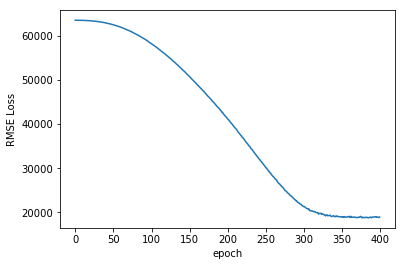

In [146]:
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

### Performance on dev set

In [ ]:
with torch.no_grad():
    y_val = model(cat_dev, con_dev)
    loss = torch.sqrt(criterion(y_val, y_dev))
print(f'RMSE: {loss:.8f}')

### Performance on test set

In [148]:
xcats = np.stack([X_test[col].cat.codes.values for col in cat_cols], 1)
xcats = torch.tensor(xcats, dtype=torch.int64)
xconts = np.stack([X_test[col].values for col in cont_cols], 1)
xconts = torch.tensor(xconts, dtype=torch.float)

In [149]:
with torch.no_grad():
    y_val = model(xcats, xconts)
    loss = torch.sqrt(criterion(y_val, torch.tensor(np.array(y_test[y_col]), dtype=torch.float)))
print(f'RMSE: {loss:.8f}')

RMSE: 19375.53710938
